In [ ]:
!pip install pillow-heif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
from pillow_heif import register_heif_opener
register_heif_opener()

pdf_src_path =  '/content/drive/MyDrive/Image Processing/Images/'
image = Image.open(pdf_src_path + 'IMG_8984.jpg')

image.convert('RGB').save(pdf_src_path + 'Panorama.png')

ModuleNotFoundError: No module named 'pillow_heif'

In [ ]:
import cv2
import numpy as np
from math import log10, sqrt

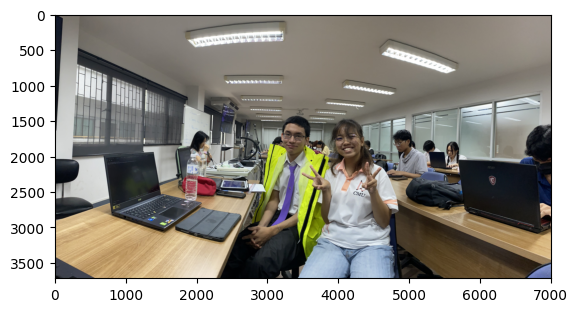

In [ ]:
file_path = '/content/drive/MyDrive/Image Processing/Images/'
file_name = 'Panorama'
file_format = '.png'
img = cv2.imread(file_path + file_name + file_format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
image = Image.open(pdf_src_path + 'Panorama.png')

# Downsample the image by a factor of 2
downsampled_image = image.resize((image.width // 2, image.height // 2))

downsampled_image.save(pdf_src_path + 'Panorama_downsampled.png')

In [ ]:
def s_and_p_noise(image, s_p_ratio=0.04):
    # this implementation is not entirely correct because it assume that
    # only 0 OR 255 values are S&P noise.
    out = np.copy(image)

    # Salt mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 255

    # Pepper mode
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 0

    return out

In [ ]:
# Add salt and pepper noise to the downsampled image
downsampled_image_snp = s_and_p_noise(np.array(downsampled_image), s_p_ratio=0.05)

# Convert the noisy image back to a PIL Image object
downsampled_image_snp_pil = Image.fromarray(downsampled_image_snp.astype('uint8'))

# Save the noisy downsampled image
downsampled_image_snp_pil.save(pdf_src_path + 'Panorama_downsampled_snp.png')

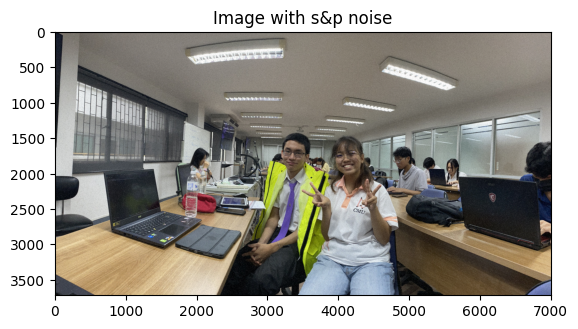

True

In [ ]:
'''img_snp = s_and_p_noise(img, s_p_ratio=0.05)

img_snp_rgb = cv2.cvtColor(img_snp, cv2.COLOR_BGR2RGB)
plt.imshow(img_snp_rgb)
plt.title('Image with s&p noise')
plt.show()

cv2.imwrite(file_path + file_name + '_snp' + file_format, img_snp)'''

#### Calculate PSNR.

MSE = 1/mn...

PSNR = 10log_10...

In [ ]:
# Calculate PSNR.
from math import log10, sqrt

In [ ]:
# Peak Signal to Noise Ratio
def PSNR(img_signal, img_noise):
    mse = np.mean((img_signal - img_noise) ** 2)
    rmse = sqrt(mse)
    if(mse == 0): # No noise is present in the image.
      return 100 # No need to calculate PSNR.
    intensity_max = 255
    psnr = 20 * log10(intensity_max / rmse)
    return psnr

In [ ]:
def main():
  img_signal = img
  img_noise = img_snppsnr = PSNR(img_signal, img_snp)
  psnr = PSNR(img_signal, img_noise)
  print('PSNR ~ {:.2f} dB.'.format(psnr))

In [ ]:
'''# Upsample the noisy downsampled image
img_noise_upsampled = cv2.resize(img_noise, (img_signal.shape[1], img_signal.shape[0]))

# Calculate PSNR
psnr = PSNR(img_signal, img_noise_upsampled)
print('PSNR ~ {:.2f} dB.'.format(psnr))'''

PSNR ~ 34.74 dB.


In [ ]:
# Downsample the original image
img_signal_downsampled = cv2.resize(img_signal, (img_noise.shape[1], img_noise.shape[0]))

# Calculate PSNR
psnr = PSNR(img_signal_downsampled, img_noise)
print('PSNR ~ {:.2f} dB.'.format(psnr))

# Save the downsampled original image
cv2.imwrite(file_path + file_name + '_downsampled' + file_format, img_signal_downsampled)

PSNR ~ 40.92 dB.


True

In [ ]:
'''if __name__ == '__main__':
  main()'''

PSNR ~ 8.45 dB.
